## Procesamiento Datos Pandas

Complete el código faltante según corresponda a manera de lograr automatizar el flujo. Finalmente adjunte una imagen del envio de correo correspondiente.



El archivo candidates.csv contiene 50k filas de datos sobre candidatos. Los campos que estamos usando son:
- First Name
- Last Name
- Email
- Country
- Application Date
- Yoe (years of experience)
- Seniority
- Technology
- Code Challenge Score
- Technical Interview


## 1. Almaceno sobre DB

In [ ]:
# lea el articulo:
# https://medium.com/analytics-vidhya/inserting-an-image-in-an-excel-file-using-pandas-and-sql-e88826680b05


In [15]:
%pip install xlsxwriter


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

import pandas as pd
import xlsxwriter
import sqlite3
import os


DB = 'candidates.db'
TABLE_NAME = 'candidate'

In [17]:
def almacenar_pandas_to_sql(df: pd.DataFrame, database_name:str, table_name:str)->None:
  """Procesamiento datos candidatos para almacenarlos sobre db """

  # rename columns
  column_rename = {c: c.replace(' ', '') for c in df.columns}
  df.rename(column_rename,axis='columns', inplace=True)

  # almaceno sobre db
 # raise 'No se implemento bd' # debe implementar el guardado a la bd
  conn = sqlite3.connect(f'{database_name}.db')
  df.to_sql(table_name, con=conn, index=False, if_exists='replace')
  conn.close()

  #
  sql_table_schema = f'{database_name}.{table_name}'
  cantidad_registros = df.shape[0]
  print(f'Se almacenaron {cantidad_registros} sobre tabla sql {sql_table_schema}')

In [18]:
# read csv
path = './src/candidates.csv'
df = pd.read_csv(path,sep=';')
df.shape

(50000, 10)

In [19]:
df.head(2)

,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10


In [20]:
almacenar_pandas_to_sql(df, DB , TABLE_NAME)

Se almacenaron 50000 sobre tabla sql candidates.db.candidate


## 2. Procesamiento Datos

Generar un reporte por separado para los paises ( 'United States of America', 'Brazil','Colombia','Ecuador') donde se deberá seleccionar a los candidatos cuyo CodeChallengeScore y TechnicalInterviewScore sea mayor igual a 7. Se deberá crear gráficos integrados sobre cada reporte y además almacenar los datos en un excel con el nombre de cada pais.

In [26]:
# 1. Lectura de datos
with sqlite3.connect(DB) as conn:
  df = pd.read_sql_query(f'select * from {TABLE_NAME}', conn)

DatabaseError: Execution failed on sql 'select * from candidate': no such table: candidate

In [27]:
df.head(2)

,FirstName,LastName,Email,ApplicationDate,Country,YOE,Seniority,Technology,CodeChallengeScore,TechnicalInterviewScore
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10


In [45]:
# 2. Filtrado de datos
# Se debe filtrar por los paises 'United States of America', 'Brazil','Colombia','Ecuador'
# COmo condicion debe ser CodeChallengeScore >=7 y TechnicalInterviewScore>=7


# cree filterDf


In [46]:
# Filtrar por países y condiciones de puntaje
filterDf = df[
    (df['Country'].isin(['United States of America', 'Brazil', 'Colombia', 'Ecuador'])) &
    (df['CodeChallengeScore'] >= 7) &
    (df['TechnicalInterviewScore'] >= 7)
]

# Mostrar el DataFrame filtrado
filterDf.head(10000)


,FirstName,LastName,Email,ApplicationDate,Country,YOE,Seniority,Technology,CodeChallengeScore,TechnicalInterviewScore
359,Johnathon,Stokes,gianni_macgyver@yahoo.com,2018-04-11,Brazil,16,Mid-Level,Salesforce,10,8
389,Khalid,Jenkins,cleo.mohr@gmail.com,2018-10-05,Colombia,13,Architect,Development - FullStack,9,7
468,Agustin,Ledner,marie.herzog74@gmail.com,2018-09-09,Ecuador,10,Lead,Design,8,8
950,Fletcher,Corkery,kelvin_jacobi@hotmail.com,2020-01-23,Ecuador,14,Junior,Game Development,10,8
1497,Orval,Hintz,haylie.hickle@gmail.com,2019-10-17,Brazil,15,Trainee,Database Administration,8,10
...,...,...,...,...,...,...,...,...,...,...
43960,Kris,Bailey,mallory_reinger72@yahoo.com,2018-11-07,Brazil,4,Lead,Development - CMS Backend,10,10
44376,Rusty,Rau,gaylord_king@hotmail.com,2018-04-20,Brazil,18,Intern,Development - Frontend,7,9
48126,Kim,Lebsack,rubie21@gmail.com,2021-11-14,Colombia,19,Junior,Development - CMS Backend,7,9
48313,Madie,Zulauf,yasmeen_cole22@gmail.com,2020-07-31,Brazil,21,Junior,Development - Backend,10,10


In [48]:
filterDf.head(2)

,FirstName,LastName,Email,ApplicationDate,Country,YOE,Seniority,Technology,CodeChallengeScore,TechnicalInterviewScore
359,Johnathon,Stokes,gianni_macgyver@yahoo.com,2018-04-11,Brazil,16,Mid-Level,Salesforce,10,8
389,Khalid,Jenkins,cleo.mohr@gmail.com,2018-10-05,Colombia,13,Architect,Development - FullStack,9,7


<Axes: ylabel='Technology'>

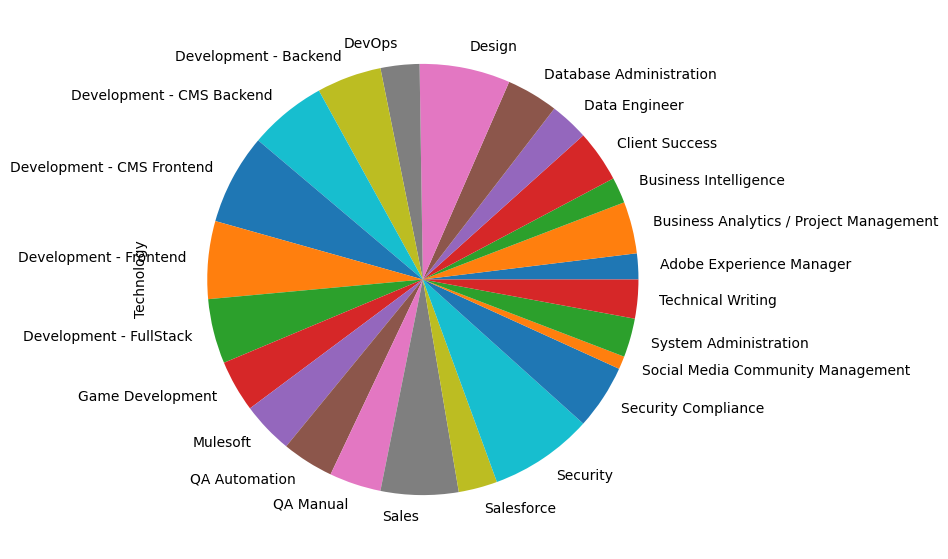

In [49]:
# - Hires by technology (pie chart)
tec = filterDf.groupby('Technology')['Technology'].count()
tec.plot.pie(figsize=(11, 7))


<Axes: xlabel='Seniority'>

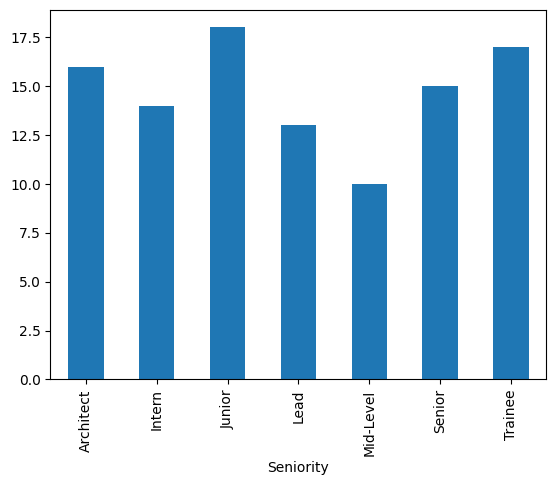

In [50]:
# - Hires by seniority (bar chart)
senority_group = filterDf.groupby('Seniority')['Seniority'].count()
senority_group.plot.bar()

### Realizo reporte automatizado

In [51]:
def genero_grafico_circular(df:pd.DataFrame, country:str)->None:
  """Funcion que se encarga de crear el gráfico en pie"""
  tec = df.groupby('Technology')['Technology'].count()
  tec.plot.pie(figsize=(11, 7))

  plt.savefig(f"./reportes/images/{country}/pie_chart.png",dpi=300, bbox_inches='tight')
  plt.close()
  print('Se genero gráfico circular ...')

In [52]:
def genero_grafico_barras(df:pd.DataFrame, country:str)->None:
  """Funcion que se encarga de crear el gráfico de barras"""

  senority_group = df.groupby('Seniority')['Seniority'].count()
  senority_group.plot.bar()

  plt.savefig(f"./reportes/images/{country}/bar_chart.png",dpi=300, bbox_inches='tight')
  plt.close()
  print('Se genero gráfico barras ...')

In [55]:

#Para que funcione listado_paises
listado_paises = ['United States of America', 'Brazil', 'Colombia', 'Ecuador']

In [56]:
# genero carpetas necesarias
if not os.path.isdir('./reportes'):
  os.mkdir('reportes')
  os.mkdir('./reportes/images')

#
for country in listado_paises:
  # creo subcarpetas
  if not os.path.isdir(f'./reportes/images/{country}'):
    os.mkdir(f'./reportes/images/{country}')

  # filtro df
  countryDf = filterDf[filterDf['Country']==country]

  # genero gráficos
  genero_grafico_circular(countryDf, country)
  genero_grafico_barras(countryDf, country)

  #Genero reporte Excel por pais
  with pd.ExcelWriter(f"./reportes/{country}.xlsx", engine= "xlsxwriter") as excelBook:

    sheet_name = f"Report-{country}"
    countryDf.to_excel(excelBook, index=False, sheet_name= sheet_name)

    # posiciono sobre hoja de excel
    excel_sheet = excelBook.sheets[sheet_name]

    # almaceno imagen
    image_pie_path = f"./reportes/images/{country}/pie_chart.png"
    image_bar_path = f"./reportes/images/{country}/bar_chart.png"

    excel_sheet.insert_image(1, countryDf.shape[1]+2, image_pie_path) # 1 y df.shape +2 -> establecen posicion de imagen en libro
    excel_sheet.insert_image(countryDf.shape[0]+2, countryDf.shape[1]+2, image_bar_path)

    # Guardo cambios sobre excel
    #excelBook.close()

    print(f'Se generó reporte para el país {country}')
    pass
  print('Se finalizó  la generacion de reportes')

Se genero gráfico circular ...
Se genero gráfico barras ...
Se generó reporte para el país United States of America
Se finalizó  la generacion de reportes
Se genero gráfico circular ...
Se genero gráfico barras ...
Se generó reporte para el país Brazil
Se finalizó  la generacion de reportes
Se genero gráfico circular ...
Se genero gráfico barras ...
Se generó reporte para el país Colombia
Se finalizó  la generacion de reportes
Se genero gráfico circular ...
Se genero gráfico barras ...
Se generó reporte para el país Ecuador
Se finalizó  la generacion de reportes


## 3. Envio Correo

In [68]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication

In [73]:
# Configuración del servidor y credenciales
import os 

smtp_server = 'smtp.gmail.com'  # Cambia esto al servidor SMTP que estés utilizando
smtp_port = 587  # Cambia esto al puerto adecuado
sender_email = 'scastillo.ngr@gmail.com'
sender_password = '------'

# Detalles del correo electrónico
receiver_email = 'sandra.libra96@gmail.com'
subject='Reporte Brazil'
#archivo_adjunto='Brazil.xlsx'


# Crear el objeto MIMEMultipart
msg = MIMEMultipart()
msg['From'] = sender_email
msg['To'] = receiver_email
msg['Subject'] = subject

# Adjuntar archivo
file_path = './Brazil.xlsx'  # Cambia la ruta al archivo que quieras adjuntar
with open(file_path, 'rb') as file:
    attachment = MIMEApplication(file.read(), _subtype="xlsx")
    attachment.add_header('Content-Disposition', 'attachment', filename=file_path)
    msg.attach(attachment)
    
# Iniciar la conexión con el servidor SMTP
with smtplib.SMTP(smtp_server, smtp_port) as server:
    server.starttls()  # Iniciar el modo seguro
    server.login(sender_email, sender_password)
    server.sendmail(sender_email, receiver_email, msg.as_string())

print('Correo enviado exitosamente')

Correo enviado exitosamente


In [69]:
def func_sender_email(**args):
  return NotImplementedError

#captura del envio del correo

![Alt text](image.png)